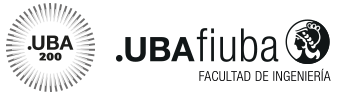

# <center> ANÁLISIS NUMÉRICO I -  MODELACIÓN NUMÉRICA
# <center> Ecuaciones no Lineales - Primera Parte
    
## <center> Métodos de arranque: Bisección y «Regula-Falsi»

***

**Curso Schwarz - Sosa - Castaño**
- 95.04 <b>Análisis Numérico I</b>. *Curso 4*.
- CB051 <b>Modelación Numérica</b>. *Curso 4*.

## <center>CASO A ANALIZAR
La longitud de onda de una ola en aguas poco profundas es:
$$L=\frac{g\cdot T^2}{2\pi}\cdot \tanh\left(\frac{2\cdot\pi\cdot d}{L}\right), $$
con:
- $L$: longitud de onda.
- $g$: aceleración de la gravedad.
- $T$: período de la ola.
- $d$: profundidad del mar.
___
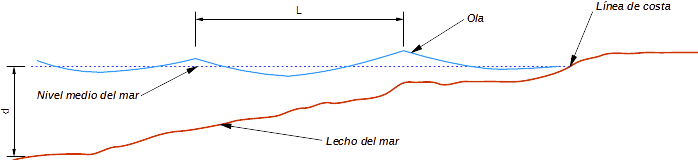


Hallar $p$ si $g=9.80665$ m/s², $T=12$ s y $d=14$ m, tal que $f(p)=0,$ $p  \in [10,150]$:
    
$$f(x)=\frac{9.80665\cdot 12^2}{2\cdot \pi}\cdot\tanh\left(\frac{2\cdot \pi\cdot 14}{x} \right)-x.$$

## <center> Búsqueda de raíces en Ecuaciones No Lineales
___

Problema a resolver: hallar $p$ tal que $f(p)=0,$ $p  \in [a,b].$

¿Por qué necesitamos una solución numérica a este problema?
- No hay forma de despejar la incógnita.
- Muchas veces resulta más cómodo plantear una solución numérica e iterativa.
- Otras veces no existe solución algebraica al problema que queremos resolver.

## <center> Primer método: Bisección
___
Supongamos una función cualquiera $f(x)$ y hallemos el valor de $\hat{x}$, tal que $f(\hat{x}) = 0$, siendo $\hat{x} \in [a,b]$.

Calculemos nuestra primera aproximación de $\hat{x}$ tomando el valor medio del intervalo, es decir:

$$ x_1= \frac{a+b}{2} $$
1. Verificar si es la solución, es decir que $f(x_1) = 0$. 
2. Si no lo es, volver a definir el intervalo. Para ello, verifiquemos que $f(a) · f(x_1) < 0$. 
3. Si es cierto, entonces nuestro nuevo intervalo será $[a, x_1]$ y si no lo es, nuestro intervalo será $[x_1, b]$. 
4. Repetir el proceso y definir $x_2$ como el valor medio de mi nuevo intervalo.
5. ¿Hasta cuándo? Tengo que definir una tolerancia y un criterio de corte

In [1]:
import numpy as np #librería para operaciones algebraicas y numéricas
import pandas as pd #librería para manejo de datos

#Método de la Bisección
def biseccion(a, b , tol, itmax = 100): 
        df = pd.DataFrame(columns=('ai','bi','pi','cond'))
        a = a 
        b = b
        contador = 0  
        x0, x1 = a, b 
        if(f(a) * f(b)>0):#Verifica la condicion de aplicabilidad del método
            print( "El método no resuelve este tipo de ecuación")
            return
        while (contador < itmax) and (abs(f(x1)) > tol):#Itera mientras la cantidad de interaciones sea menor a itmax y |f(x)| sea mayor a la tolerancia
            x0 = x1                                                 
            x1 = (a + b)/2                      
            if f(x1) * f(a) < 0:      
                df.loc[contador] = [a,b,(a+b)/2,'<0']
                b = x1
            else:
                df.loc[contador] = [a,b,(a+b)/2,'>0']
                a = x1
            contador += 1                      
        er = abs((x1 - x0) / x1)
        print('El \033[1mMétodo de la Bisección \033[0mconvergió en',contador,'iteraciones, el resultado es:',np.round(a,6),'m y el error relativo es',np.format_float_scientific(er,precision=6),'. El valor de la función resulta',np.format_float_scientific(f(x1),precision=6),"m.")
        return df


<b>Importante</b>: para aplicar el método se debe cumplir:

1. Que la función sea <i>contínua</i> en el intervalo
2. Que exista una raíz en el intervalo y que sea única y con multiplicidad impar (si «rebota», no puedo aplicar el método)


In [2]:
#Intervalo de arranque y Tolerancia
A=10
B=150
tolerancia=10**(-8)

def f(x):#Definición de la función
    return (9.80665*12**2)/(2*np.pi)*np.tanh((2*np.pi*14/x))-x  #Acá está el ejemplo de arriba, deben cambiar la función si quieren probar otra 

ejemplo=biseccion(A, B, tolerancia)


El Método de la Bisección convergió en 32 iteraciones, el resultado es: 131.395838 m y el error relativo es 2.480770e-10 . El valor de la función resulta 7.58061e-09 m.


In [3]:
from IPython.display import display, Math #Importa una aplicación para mejorar la escritura.
import sympy.printing as printing #Importa una aplciación para imprimir en pantalla la escritura simbólica.

a = ejemplo.ai
b = ejemplo.bi
x = ejemplo.pi
cond= ejemplo.cond

print ("Analicemos las primeras iteraciones. \n")  

for p in range (11):
    print ("\033[1mIteración \033[0m"+str(p+1)+": ")
    print ("Tenemos como información que: \n")
    ec = "a_{"+str(p)+"}= "+str(a[p])+";b_{"+str(p)+"}= "+str(b[p])+";x_{"+str(p)+"}=\\frac{a_{"+str(p)+"}+b_{"+str(p)+"}}{2}"+"="+str(x[p])
    display(Math(printing.latex(ec,mul_symbol='dot')))
    
    print ("Evaluamos en qué intervalo se encuentra la raíz:")
        
    ec = "f(a_{"+str(p)+"})·f(x_{"+str(p)+"})"+"= "+"f("+str(a[p])+")·f("+str(x[p])+")"+str(cond[p])
    display(Math(printing.latex(ec,mul_symbol='dot')))
    
    print ("Por lo tanto, redefinimos los extremos del intervalo en la próxima iteración. \n") 
    
    
    
    

Analicemos las primeras iteraciones. 

Iteración 1: 
Tenemos como información que: 



<IPython.core.display.Math object>

Evaluamos en qué intervalo se encuentra la raíz:


<IPython.core.display.Math object>

Por lo tanto, redefinimos los extremos del intervalo en la próxima iteración. 

Iteración 2: 
Tenemos como información que: 



<IPython.core.display.Math object>

Evaluamos en qué intervalo se encuentra la raíz:


<IPython.core.display.Math object>

Por lo tanto, redefinimos los extremos del intervalo en la próxima iteración. 

Iteración 3: 
Tenemos como información que: 



<IPython.core.display.Math object>

Evaluamos en qué intervalo se encuentra la raíz:


<IPython.core.display.Math object>

Por lo tanto, redefinimos los extremos del intervalo en la próxima iteración. 

Iteración 4: 
Tenemos como información que: 



<IPython.core.display.Math object>

Evaluamos en qué intervalo se encuentra la raíz:


<IPython.core.display.Math object>

Por lo tanto, redefinimos los extremos del intervalo en la próxima iteración. 

Iteración 5: 
Tenemos como información que: 



<IPython.core.display.Math object>

Evaluamos en qué intervalo se encuentra la raíz:


<IPython.core.display.Math object>

Por lo tanto, redefinimos los extremos del intervalo en la próxima iteración. 

Iteración 6: 
Tenemos como información que: 



<IPython.core.display.Math object>

Evaluamos en qué intervalo se encuentra la raíz:


<IPython.core.display.Math object>

Por lo tanto, redefinimos los extremos del intervalo en la próxima iteración. 

Iteración 7: 
Tenemos como información que: 



<IPython.core.display.Math object>

Evaluamos en qué intervalo se encuentra la raíz:


<IPython.core.display.Math object>

Por lo tanto, redefinimos los extremos del intervalo en la próxima iteración. 

Iteración 8: 
Tenemos como información que: 



<IPython.core.display.Math object>

Evaluamos en qué intervalo se encuentra la raíz:


<IPython.core.display.Math object>

Por lo tanto, redefinimos los extremos del intervalo en la próxima iteración. 

Iteración 9: 
Tenemos como información que: 



<IPython.core.display.Math object>

Evaluamos en qué intervalo se encuentra la raíz:


<IPython.core.display.Math object>

Por lo tanto, redefinimos los extremos del intervalo en la próxima iteración. 

Iteración 10: 
Tenemos como información que: 



<IPython.core.display.Math object>

Evaluamos en qué intervalo se encuentra la raíz:


<IPython.core.display.Math object>

Por lo tanto, redefinimos los extremos del intervalo en la próxima iteración. 

Iteración 11: 
Tenemos como información que: 



<IPython.core.display.Math object>

Evaluamos en qué intervalo se encuentra la raíz:


<IPython.core.display.Math object>

Por lo tanto, redefinimos los extremos del intervalo en la próxima iteración. 



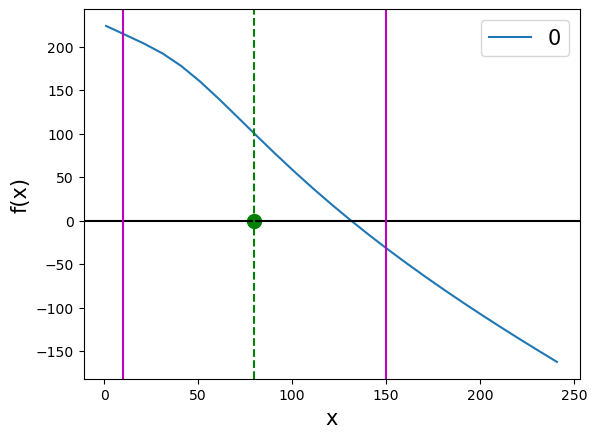

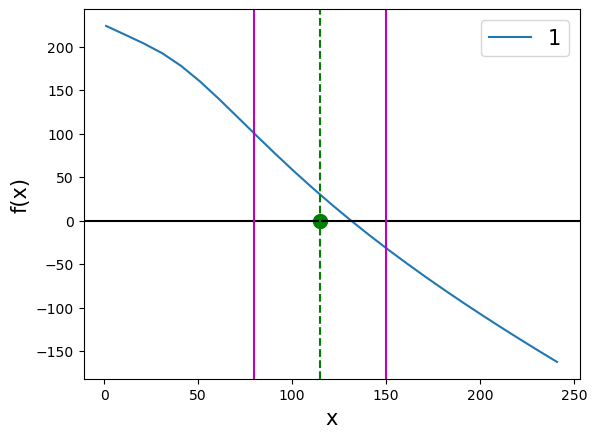

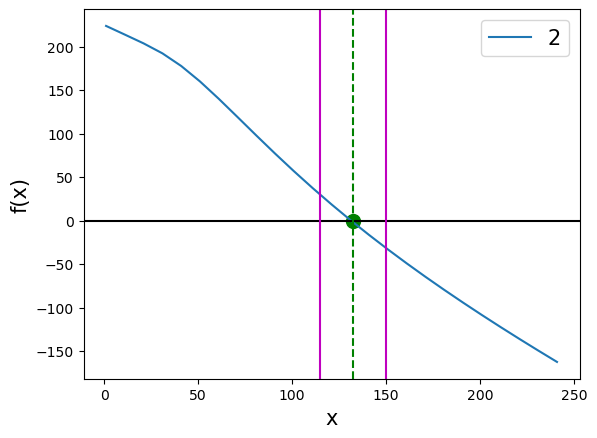

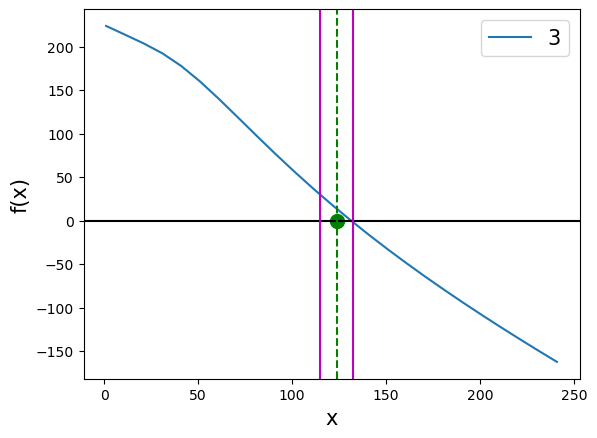

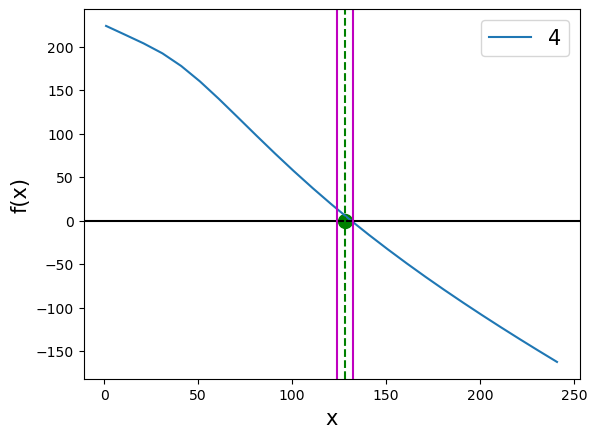

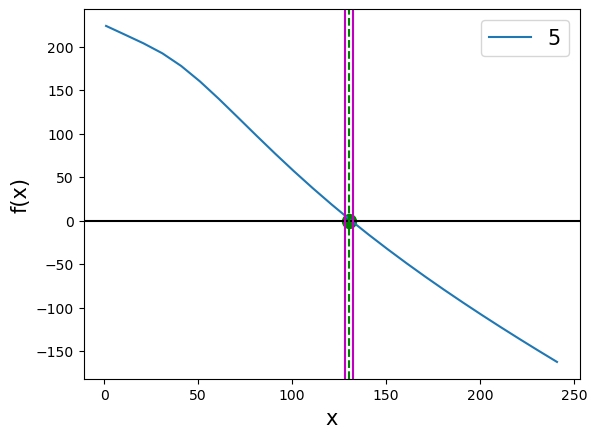

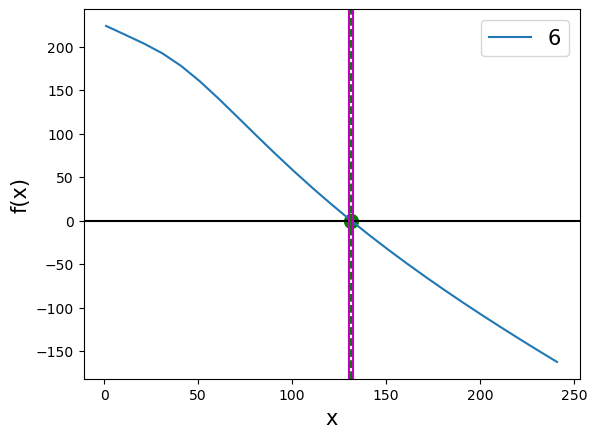

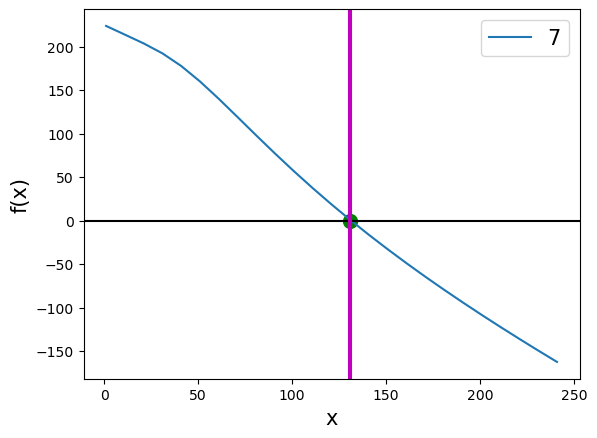

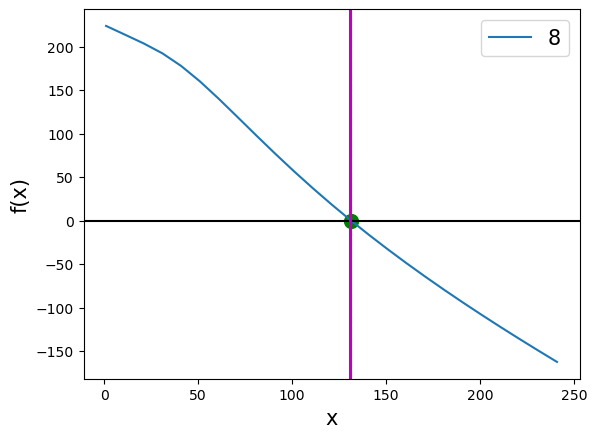

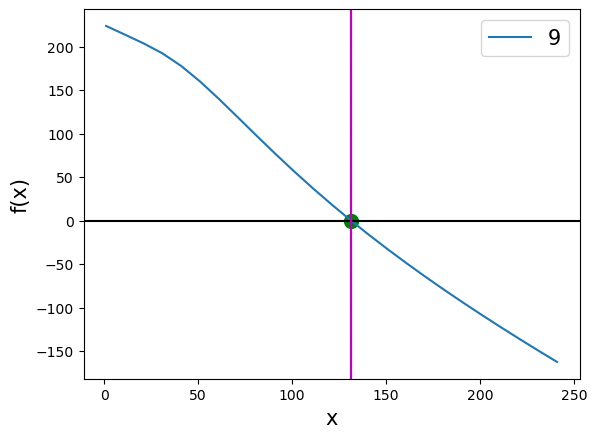

In [4]:
import matplotlib.pyplot as plt #Importa una aplicación para graficar funciones.
ejex = np.arange(1, 250, 10);
y = f(ejex)

for p in range (10):
    fig = plt.figure()
    plt.plot(ejex, y)
    plt.xlabel('x',fontsize=15)
    plt.ylabel('f(x)',fontsize=15)
    plt.legend(str(p),fontsize=15)
    plt.axhline(y=0, color='k')   
    plt.scatter(x=x[p], y=0, marker="o", c='green', s=100)
    plt.axvline(x=x[p], color='g',linestyle='dashed') 
    plt.axvline(x=a[p], color='m') 
    plt.axvline(x=b[p], color='m'); 

In [5]:
print('Resumen de resultados para el \033[1mMétodo de la Bisección\033[0m:')
print('A continuación se muestran las primeras diez iteraciones:')
ejemplo.head(10)

Resumen de resultados para el Método de la Bisección:
A continuación se muestran las primeras iteraciones:


,ai,bi,pi,cond
0,10.000000,150.00000,80.000000,>0
1,80.000000,150.00000,115.000000,>0
2,115.000000,150.00000,132.500000,<0
3,115.000000,132.50000,123.750000,>0
4,123.750000,132.50000,128.125000,>0
5,128.125000,132.50000,130.312500,>0
6,130.312500,132.50000,131.406250,<0
7,130.312500,131.40625,130.859375,>0
8,130.859375,131.40625,131.132812,>0
9,131.132812,131.40625,131.269531,>0


In [8]:
print('Y las últimas diez iteraciones:')
ejemplo.tail(10)

Y las últimas diez iteraciones:


,ai,bi,pi,cond
22,131.395836,131.395869,131.395853,<0
23,131.395836,131.395853,131.395844,<0
24,131.395836,131.395844,131.395840,<0
25,131.395836,131.395840,131.395838,<0
26,131.395836,131.395838,131.395837,>0
27,131.395837,131.395838,131.395837,>0
28,131.395837,131.395838,131.395838,>0
29,131.395838,131.395838,131.395838,<0
30,131.395838,131.395838,131.395838,<0
31,131.395838,131.395838,131.395838,>0


En la tabla, «cond» hace referencia al producto de $f(a_i)\cdot f(x_i)$, que es la condición que estamos evaluando para redefinir el nuevo intervalo donde vamos a buscar la raíz.

## <center> Segundo Método: «Regula Falsi» o de la «Falsa Posición»
___
Supongamos una función cualquiera $f(x)$ y hallemos el valor de $\hat{x}$, tal que $f(\hat{x}) = 0$, siendo $\hat{x} \in [a,b]$.

Calculemos nuestra primera aproximación de $\hat{x}$ utilizando la cuerda que une los extremos de la función, es decir:

$$ x_1= a_1-f(a_1)\cdot\frac{b_1-a_1}{f(b_1)-f(a_1)}, ó $$  $$ x_1= b_1-f(b_1)\cdot\frac{b_1-a_1}{f(b_1)-f(a_1)} $$
1. Verificar si es la solución, es decir que $f(x_1) = 0$. 
2. Si no lo es, volver a definir el intervalo. Para ello, verifiquemos que $f(a) · f(x_1) < 0$. 
3. Si es cierto, entonces nuestro nuevo intervalo será $[a, x_1]$ y si no lo es, nuestro intervalo será $[x_1, b]$. 
4. Repetir el proceso y definir $x_2$ como el valor medio de mi nuevo intervalo.
5. ¿Hasta cuándo? Como en el caso anterior, hay que definir una tolerancia y un criterio de corte

In [9]:
def regulafalsi(a, b , tol, itmax = 100): 
        df = pd.DataFrame(columns=('ai','bi','pi','cond'))
        a = a 
        b = b
        contador = 0  
        x0, x1 = a, b 
        if(f(a) * f(b)>0):#Verifica la condicion de aplicabilidad del método
            print( "El método no resuelve este tipo de raíz")
            return
        while (contador < itmax) and (abs(f(x1)) > tol):
            x0 = x1                                                 
            x1 = a-(f(a)*(b-a)/(f(b)-f(a)))                    
            if f(x1) * f(a) < 0:      
                df.loc[contador] = [a,b,a-(f(a)*(b-a)/(f(b)-f(a))) ,'<0']
                b = x1
            else:
                df.loc[contador] = [a,b,a-(f(a)*(b-a)/(f(b)-f(a))) ,'>0']
                a = x1
            contador += 1                      
        er = abs((x1 - x0) / x1)
        print('El \033[1mMétodo de la «Regula-Falsi» \033[0mconvergió en',contador,'iteraciones, el resultado es:',np.round(x1,6),'m y el error relativo es',np.format_float_scientific(er,precision=6),'. El valor de la función resulta',np.format_float_scientific(f(x1),precision=6),'m.')
        return df

Apliquemos el método a la ecuación definida.

In [10]:
#aplico el método Regula Falsi al mismo ejemplo anterior

ejemploRF=regulafalsi(A, B, tolerancia)

El Método de la «Regula-Falsi» convergió en 5 iteraciones, el resultado es: 131.395838 m y el error relativo es 3.967392e-09 . El valor de la función resulta -7.973171e-09 m.


In [12]:
aRF = ejemploRF.ai
bRF = ejemploRF.bi
xRF = ejemploRF.pi
condRF= ejemploRF.cond

print ("Analicemos las primeras iteraciones. \n")  

for p in range (3):
    print ("\033[1mIteración \033[0m"+str(p+1)+": ")
    print ("Tenemos como información que: \n")
    ec = "a_{"+str(p)+"}= "+str(aRF[p])+";b_{"+str(p)+"}= "+str(bRF[p])+";x_{"+str(p)+"}=a_{"+str(p)+"}-f(a_{"+str(p)+"})·\\frac{b_{"+str(p)+"}-a_{"+str(p)+"}}{f(b_{"+str(p)+"})-f(a_{"+str(p)+"})}"+"="+str(xRF[p])
    display(Math(printing.latex(ec,mul_symbol='dot')))
    
    print ("Evaluamos en qué intervalo se encuentra la raíz:")
        
    ec = "f(a_{"+str(p)+"})·f(x_{"+str(p)+"})"+"= "+"f("+str(aRF[p])+")·f("+str(xRF[p])+")"+str(condRF[p])
    display(Math(printing.latex(ec,mul_symbol='dot')))
    
    print ("Por lo tanto, redefinimos los extremos del intervalo en la próxima iteración. \n") 
    


Analicemos las primeras iteraciones. 

Iteración 1: 
Tenemos como información que: 



<IPython.core.display.Math object>

Evaluamos en qué intervalo se encuentra la raíz:


<IPython.core.display.Math object>

Por lo tanto, redefinimos los extremos del intervalo en la próxima iteración. 

Iteración 2: 
Tenemos como información que: 



<IPython.core.display.Math object>

Evaluamos en qué intervalo se encuentra la raíz:


<IPython.core.display.Math object>

Por lo tanto, redefinimos los extremos del intervalo en la próxima iteración. 

Iteración 3: 
Tenemos como información que: 



<IPython.core.display.Math object>

Evaluamos en qué intervalo se encuentra la raíz:


<IPython.core.display.Math object>

Por lo tanto, redefinimos los extremos del intervalo en la próxima iteración. 



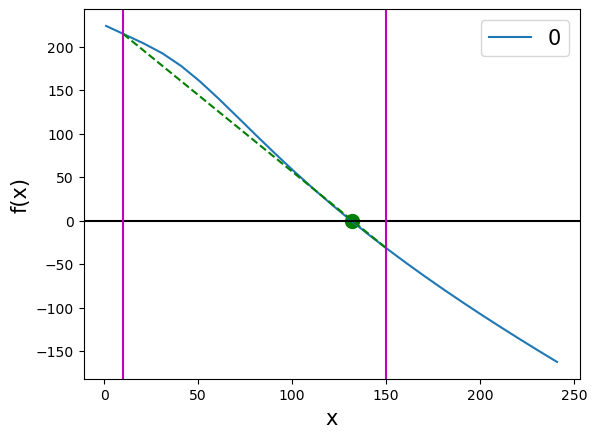

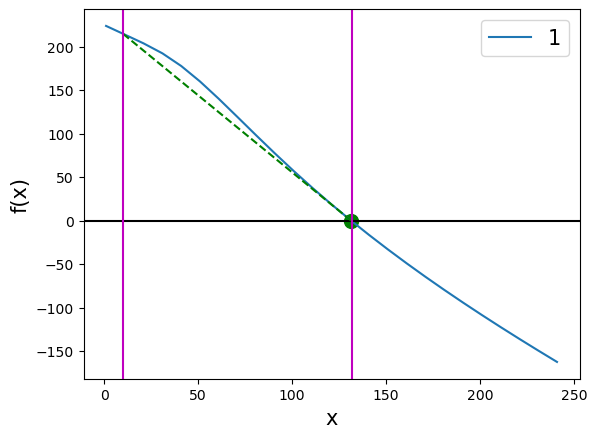

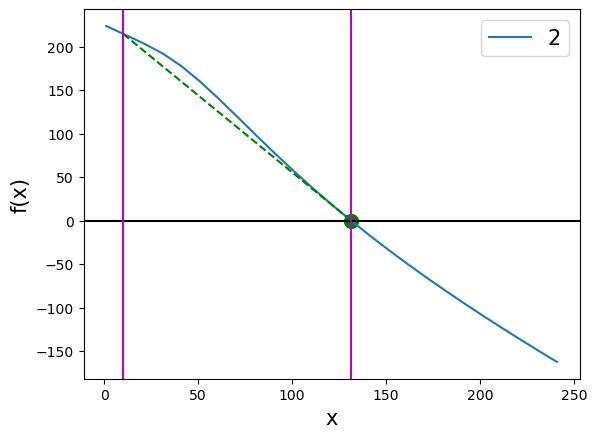

In [14]:
ejex = np.arange(1, 250, 10);
y = f(ejex)

for p in range (3):
    fig = plt.figure()
    plt.plot(ejex, y)
    plt.xlabel('x',fontsize=15)
    plt.ylabel('f(x)',fontsize=15)
    plt.legend(str(p),fontsize=15)
    plt.axhline(y=0, color='k')   
    plt.scatter(x=xRF[p], y=0, marker="o", c='green', s=100)
    plt.plot([aRF[p],bRF[p]], [f(aRF[p]),f(bRF[p])], color='g',linestyle='dashed')
    plt.axvline(x=aRF[p], color='m') 
    plt.axvline(x=bRF[p], color='m'); 
    

### <center> ¿Qué diferencia(s) encuentran respecto del método anterior?</b>

In [15]:
print('Resumen de resultados para el \033[1mMétodo de la «Regula-Falsi»\033[0m:')
print('A continuación se muestran todas las iteraciones:')
ejemploRF.head(15)

Resumen de resultados para el Método de la «Regula-Falsi»:
A continuación se muestran todas las iteraciones:


,ai,bi,pi,cond
0,10,150.000000,132.099918,<0
1,10,132.099918,131.402861,<0
2,10,131.402861,131.395899,<0
3,10,131.395899,131.395838,<0
4,10,131.395838,131.395838,<0


Nuevamente, en la tabla, «cond» hace referencia al producto de $f(a_i)\cdot f(x_i)$, que es la condición que estamos evaluando para redefinir el nuevo intervalo donde vamos a buscar la raíz.

### Algunas conclusiones
___

Tanto el método _Bisección_ como el método _Regula Falsi_ se consideran como __Métodos de arranque__.
Estos convergen __siempre__, pero lo hacen muy lentamente.
El método _Regula Falsi_ converge más rápido que _Bisección_ debido a que usa información de la función para aproximar la raíz.

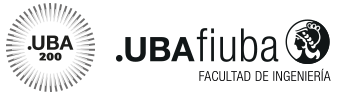


# <center> GRACIAS POR SU ATENCIÓN

## <center> ¿PREGUNTAS?


### <center> Ecuaciones no Lineales - Primera Parte

***

**Curso Schwarz - Sosa - Castaño**
- 75.12/95.04 <b>Análisis Numérico I</b>. *Curso 4*.
- CB051 <b>Modelación Numérica</b>. *Curso 4*.